In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [13]:
df = pd.read_excel(r'C:\Users\HP\Videos\Assignment question\glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [15]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Exploratory Data Analysis (EDA):

In [20]:
# Check for missing values

df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [22]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [34]:
print(df.dtypes)   #datatypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [32]:
#Class Distribution
print(df['Type'].value_counts(normalize=True))

Type
2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: proportion, dtype: float64


### Data Visualization:

<Figure size 2000x1500 with 0 Axes>

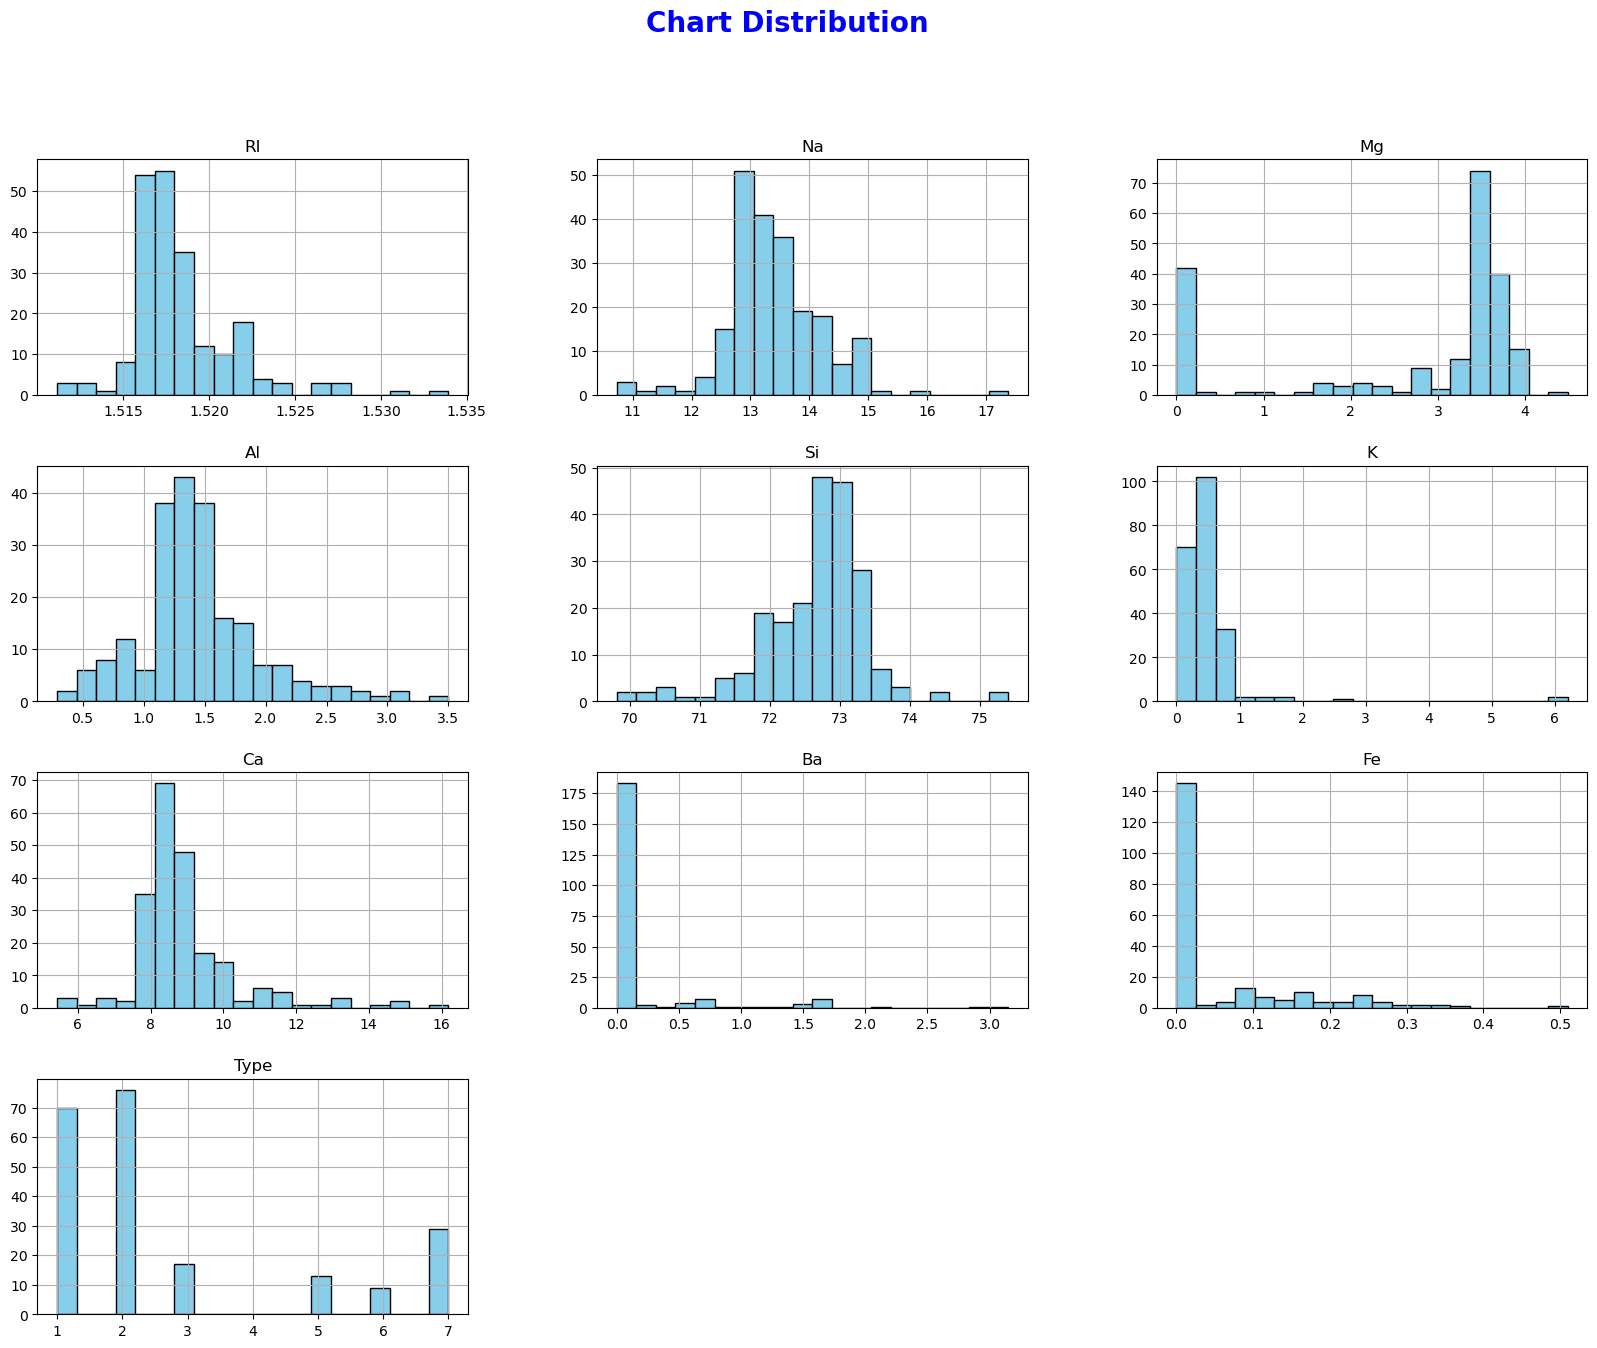

In [55]:
#Histogram:

plt.figure(figsize=(20,15))
df.hist(figsize=(20,15),color='skyblue',edgecolor='black',bins=20,)
plt.suptitle("Chart Distribution",color='Blue',fontsize=20,fontweight='bold')
plt.show();

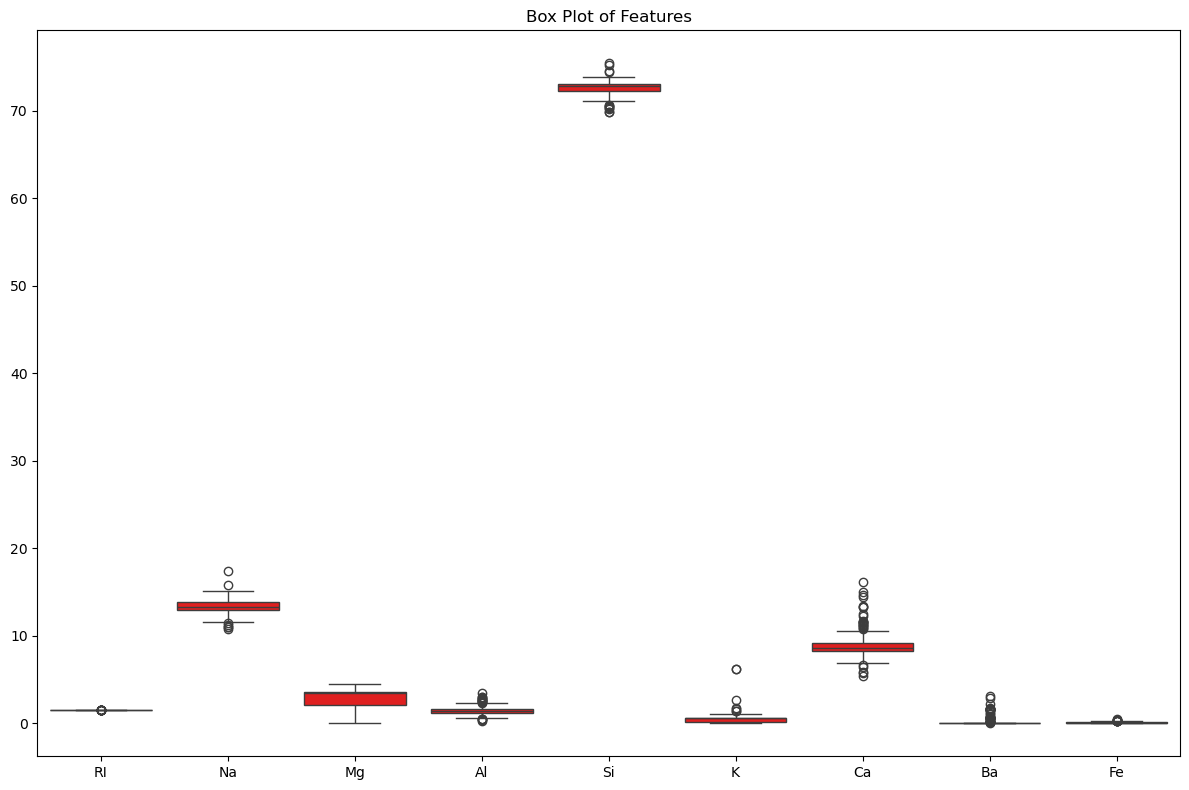

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('Type', axis=1),color='red')
plt.title('Box Plot of Features')
plt.tight_layout()
plt.show()

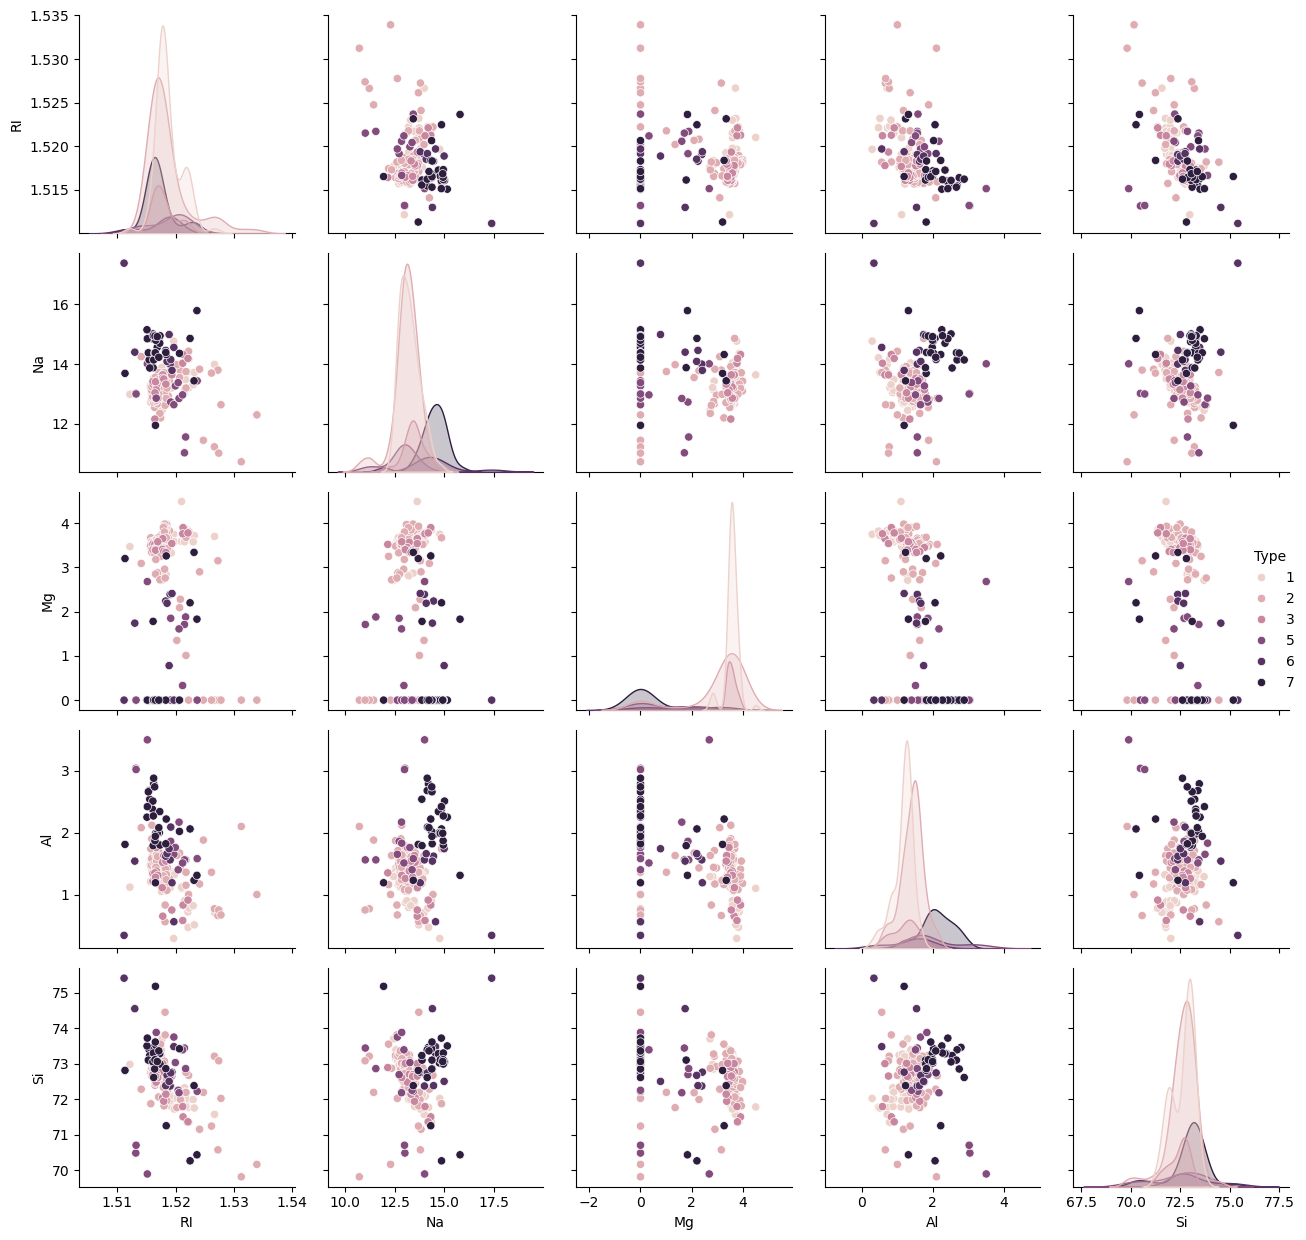

In [59]:
#Pair plot for selected features

sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Type']], hue='Type')
plt.tight_layout()
plt.show()

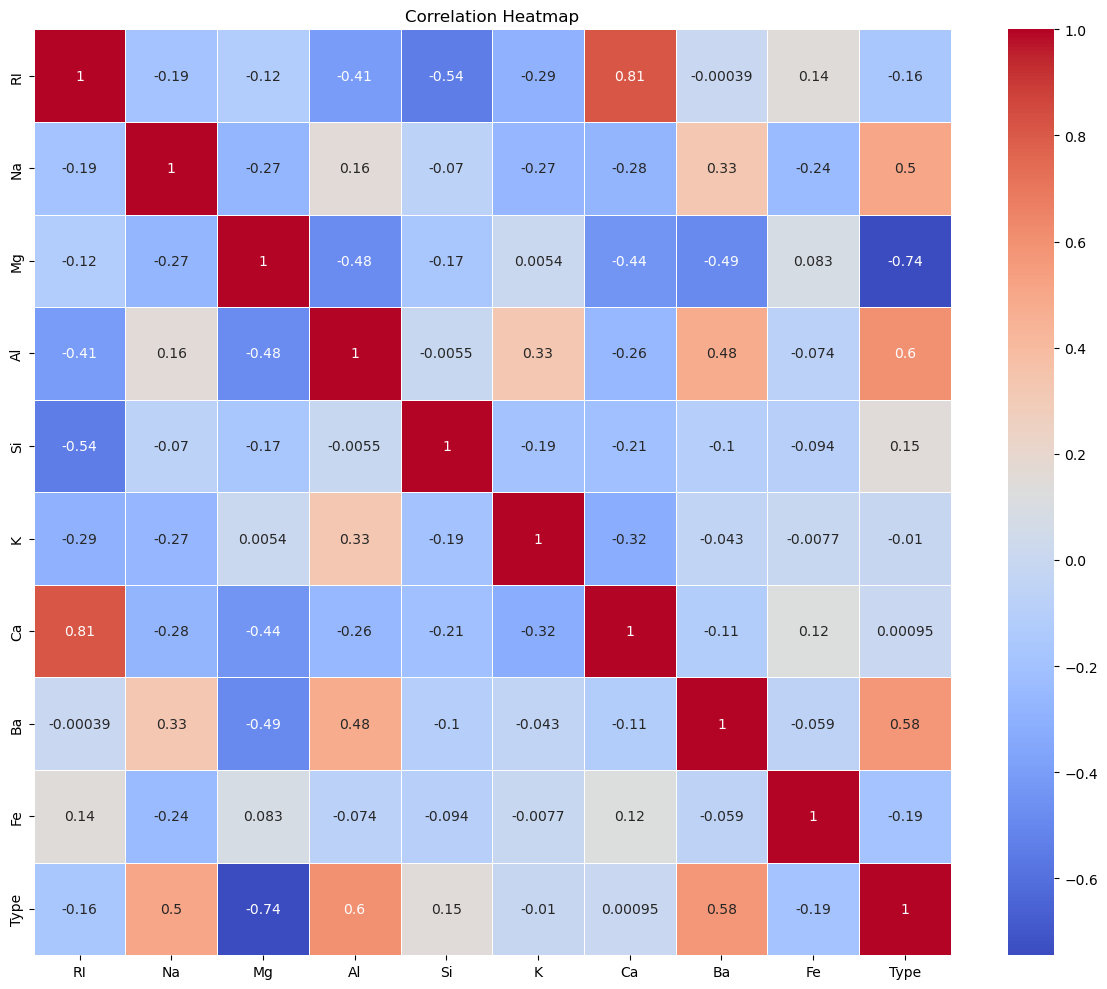

In [61]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Data Preprocessing:

In [64]:
#Seperate features and target
x=df.drop('Type',axis=1)
y=df['Type']

In [72]:
#Applying feature scaling
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)
scalar

StandardScaler()

In [68]:
x_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [74]:
# Handle the class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

In [76]:
x_train,x_test,y_train,y_test =train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (364, 9)
x_test (92, 9)
y_train (364,)
y_test (92,)


In [86]:
# Train Random Forest model
random_forest_class = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_class.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


In [94]:
# Train and evaluate random forest classifier

y_pred = random_forest_class.predict(x_test) # Make predictions using the trained model and store it in rf_pred
print("\nRandom Forest Classification Report:") # Print the classification report
print(classification_report(y_test,y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



In [104]:
from sklearn.metrics import accuracy_score

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9239130434782609


### Bagging and Boosting Methods

In [107]:
# Train and evaluate Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [111]:
b_pred = bagging_model.predict(x_test)
print("\nBagging Classifier Classification Report:")
print(classification_report(y_test,b_pred))


Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92



In [113]:
# Train and evaluate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [117]:
gb_pred = gb_model.predict(x_test)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test,gb_pred))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       1.00      0.89      0.94        19
           3       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



### 1. Explain Bagging and Boosting methods. How is it different from each other.

### 2. Explain how to handle imbalance in the data.